# Gravity Spy's Dataset: Glitch Multiclass Classification

<img src="image-20250206-010735.png" width="" align="" />

> Deva Mucaj, A.S. 2024/2025, Bachelor in Artificial Intelligence, Machine Learning, Deep Learning and Neural Networks | Module 1 Project

# Introduction

<img src="image-20250213-180752.png" width="" align="" />

<img src="image-20250213-181023.png" width="" align="" />

<img src="image-20250216-191348.png" width="" align="" />

# Objective

This project aims to develop a multi-class classification model to identify different types of glitches in gravitational wave detection signals. By leveraging a set of measured features, the model will help differentiate among various glitch categories.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import math
import statsmodels

from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, PowerTransformer
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import loguniform, beta, uniform, zscore
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.pipeline import Pipeline as IMBPipeline

from itertools import product

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as IMBPipeline


import missingno as msno

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

print('setup complete')

setup complete


# Dataset Loading and Visualization

In [2]:
# Load the dataset
file_path = "dataset_v1d1_metadata.csv"
df = pd.read_csv(file_path)

# Visualise the firt lines
df.head()

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,...,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,...,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,...,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,...,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,...,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,...,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


In [3]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (7966, 28)


We have a dataset containing 28 columns (one of them is the target column 'label'), and 7966 rows (samples).

# Exploration of the dataset

We want to check the type of data in the dataset and how many unique values we have.

In [4]:
df.info()
# Check also unique values
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_time       7966 non-null   float64
 1   ifo              7966 non-null   object 
 2   peak_time        7966 non-null   int64  
 3   peak_time_ns     7966 non-null   int64  
 4   start_time       7966 non-null   int64  
 5   start_time_ns    7966 non-null   int64  
 6   duration         7966 non-null   float64
 7   search           7966 non-null   object 
 8   process_id       7966 non-null   int64  
 9   event_id         7966 non-null   int64  
 10  peak_frequency   7966 non-null   float64
 11  central_freq     7966 non-null   float64
 12  bandwidth        7966 non-null   float64
 13  channel          7966 non-null   object 
 14  amplitude        7966 non-null   float64
 15  snr              7966 non-null   float64
 16  confidence       7966 non-null   int64  
 17  chisq         

event_time         7966
ifo                   2
peak_time          7826
peak_time_ns       1896
start_time         7826
start_time_ns       821
duration           1807
search                2
process_id            1
event_id            852
peak_frequency      754
central_freq       3597
bandwidth          3598
channel               1
amplitude          7951
snr                7955
confidence            1
chisq                 1
chisq_dof             1
param_one_name        1
param_one_value    7913
gravityspy_id      7966
label                22
sample_type           3
url1               7966
url2               7966
url3               7966
url4               7966
dtype: int64

There are mainly numerical values, but there are also a lot of categorical ones. Nonetheless, we know from up front that we have to drop the coloumns "url1", "url2", "url3", and "url4", since they represent links to images, which we do not need for the classification. Moreover, the dataset already has the training/testing/validation division, which we want to implement autonomously, so we remove also the "sample_type" coloumn. Also, the dataset contains an id for every sample, the 'gravityspy_id' which is just a unique identifier and does not contribute any meaningful information for predicting glitch types. The feature "search" expresses the output of a transient excess power identification algorithm, which is Omicron. This feature is the same for every sample (sometimes written "Omicron", other times "OMICRON", and is therefore irrelevant for our classification task. Also the features 'confidence', 'chisq' and 'chisq_dof'  have the same values across all samples, making it useless for the classification. Finally, the features 'channel' and 'param_one_name' are not informative, since they possess the same value for each sample. We also have other id features: 1) the 'process_id' has the same value for every sample, and is therfore uninformative, 2) the 'event_id' but since it's not unique for every sample, it might be informative for the classification, so we will review it later on.

(Specifically, The `chisq` (Chi-Square statistic) measures how much the observed data differs from expected data. A higher `chisq` value indicates greater deviation, suggesting potential outliers or a poor model fit, while a lower value suggests the data aligns well with expectations. The `chisq_dof` (Degrees of Freedom for Chi-Square) represents the complexity of the dataset by determining how many independent variations exist. A higher `chisq_dof` means more variability, whereas a lower value suggests a simpler dataset with fewer independent factors. 

In a context of glitch classification, `chisq` can be used for feature selection by identifying which features are statistically significant, to determine whether predictions align with actual data, and to indicate anomalies in signal classification, but. here, these feature are useless.)

In [5]:
columns_to_drop = ['url1', 'url2', 'url3', 'url4', 'sample_type', 'gravityspy_id', 'search','channel', 'param_one_name', 'confidence', 'chisq', 'chisq_dof', 'process_id']
df = df.drop(columns=columns_to_drop, errors='ignore')

Let's be sure that we don't have trailing spaces (some column names might have unnecessary spaces at the end) or case sensitivity (column names may have different capitalizations) in our coloumns.

In [6]:
# strip spaces and convert to lowercase just in case
df.columns = df.columns.str.strip().str.lower()

Let's check if there are any trailing dots. If there are there can be some difficulties in the data processing

In [7]:
# Check column with values with trailing dots
trailing_dot_columns = {}
for col in df.select_dtypes(include=['object']).columns:
    if df[col].astype(str).str.endswith('.').any():
        trailing_dot_columns[col] = df_[col][df[col].astype(str).str.endswith('.')].unique()

# Display columns with trailing dots if found
if trailing_dot_columns:
    trailing_dot_columns_df = pd.DataFrame([(k, v) for k, v in trailing_dot_columns.items()], columns=['Column', 'Example Values'])
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Columns with trailing dots", dataframe=trailing_dot_columns_df)
else:
    print("No columns with trailing dots found.")

No columns with trailing dots found.


## Data Distribution

We want to check and analyse the distribution of our data, of our features.

### Data visualization

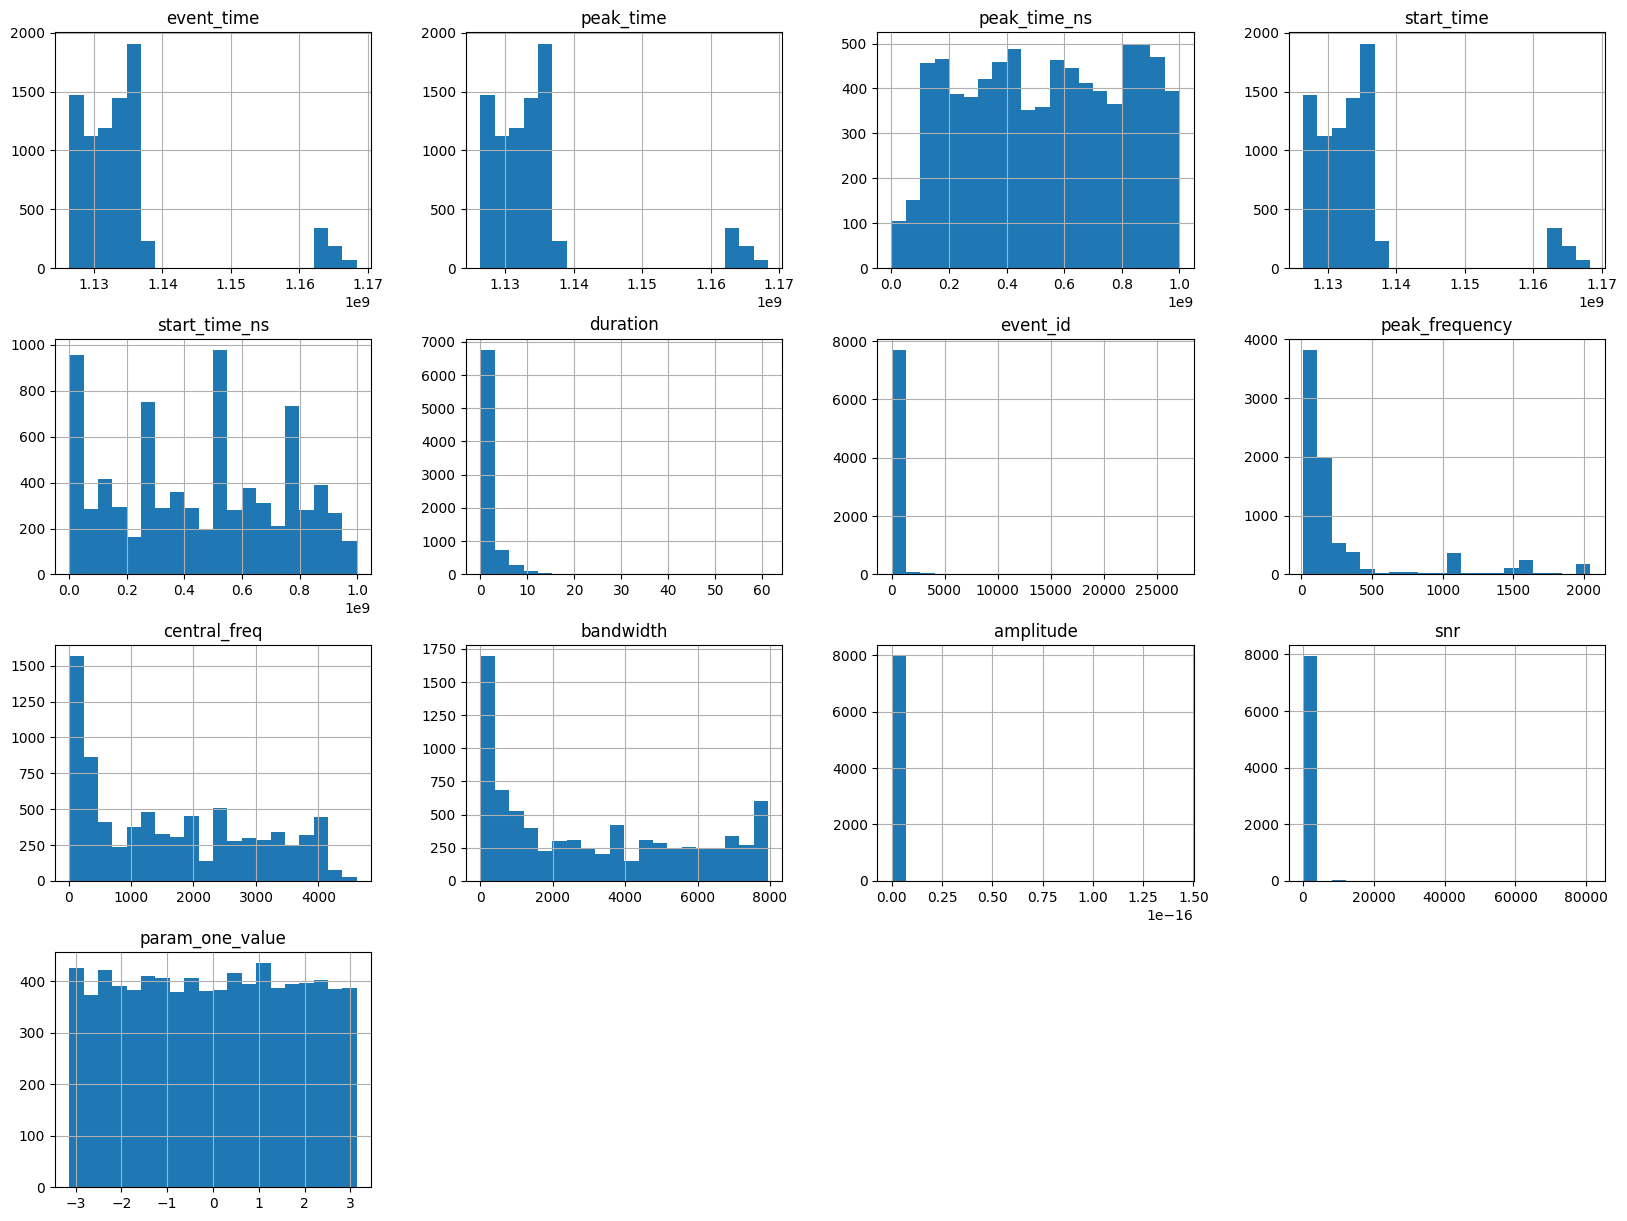

In [8]:
# Filter only numeric columns for plotting
numeric_columns = df.select_dtypes(include=[np.number])

numeric_columns.hist(figsize=(20, 15), bins=20)
plt.show()

There are some feature that show little variance: 'amplitude', and 'snr' (signal to noise ratio). Let's analyse them further.

In [9]:
df[['amplitude', 'snr']]

,amplitude,snr
0,1.197650e-22,7.511390
1,8.255850e-23,9.630130
2,9.762940e-22,15.371040
3,1.462120e-22,10.321160
4,4.038300e-22,14.380160
...,...,...
7961,2.120510e-19,1033.286987
7962,5.184990e-22,8.623000
7963,4.994010e-22,19.424089
7964,2.744010e-22,8.651070


To be more precise, we can compute the standard deviation of these features. It measures the spread or variability of the data values for that feature around its mean. A low standard deviation indicates that the data points are clustered closely around the mean, while a high standard deviation shows that the data points are more spread out.

In [10]:
print(df['amplitude'].std())
print(df['snr'].std())

1.7248130677854747e-18
1456.5079287810206


Let's also plot them using a boxplot

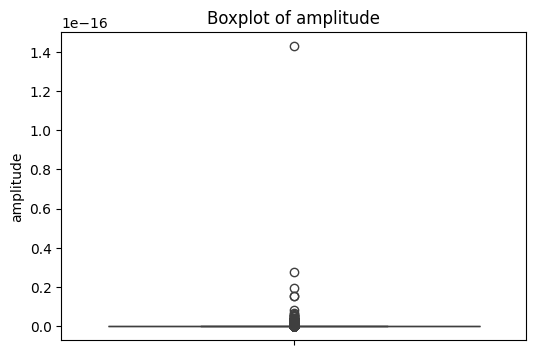

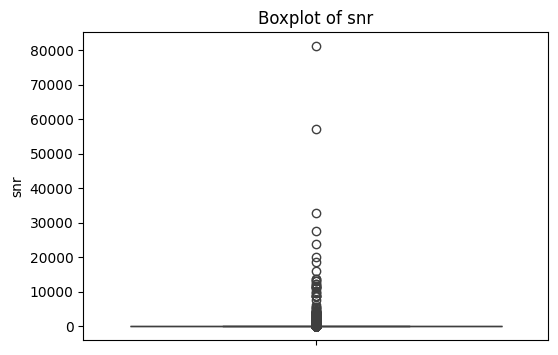

In [11]:
features = ['amplitude', 'snr']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

The boxplots of 'amplitude' and 'snr' reveal significant outliers in both features. 

In the 'amplitude' boxplot, the vast majority of the data points are clustered close to zero, but there are a few extreme outliers, with one particularly high value. This indicates that while most amplitude values are relatively small, a few instances deviate significantly from the norm.

The 'snr' boxplot shows a similar trend but with even more extreme outliers. The distribution appears highly skewed, with numerous values far exceeding the upper whisker. Some of these outliers reach exceptionally high values, suggesting that the dataset contains instances with very high signal strength relative to the noise.

These feature are relevant to the classification (and we can already predict that they will need robust scaling due to the presence of outliers).

Now we search for missing values.

In [12]:
df.isnull().sum()

event_time         0
ifo                0
peak_time          0
peak_time_ns       0
start_time         0
start_time_ns      0
duration           0
event_id           0
peak_frequency     0
central_freq       0
bandwidth          0
amplitude          0
snr                0
param_one_value    0
label              0
dtype: int64

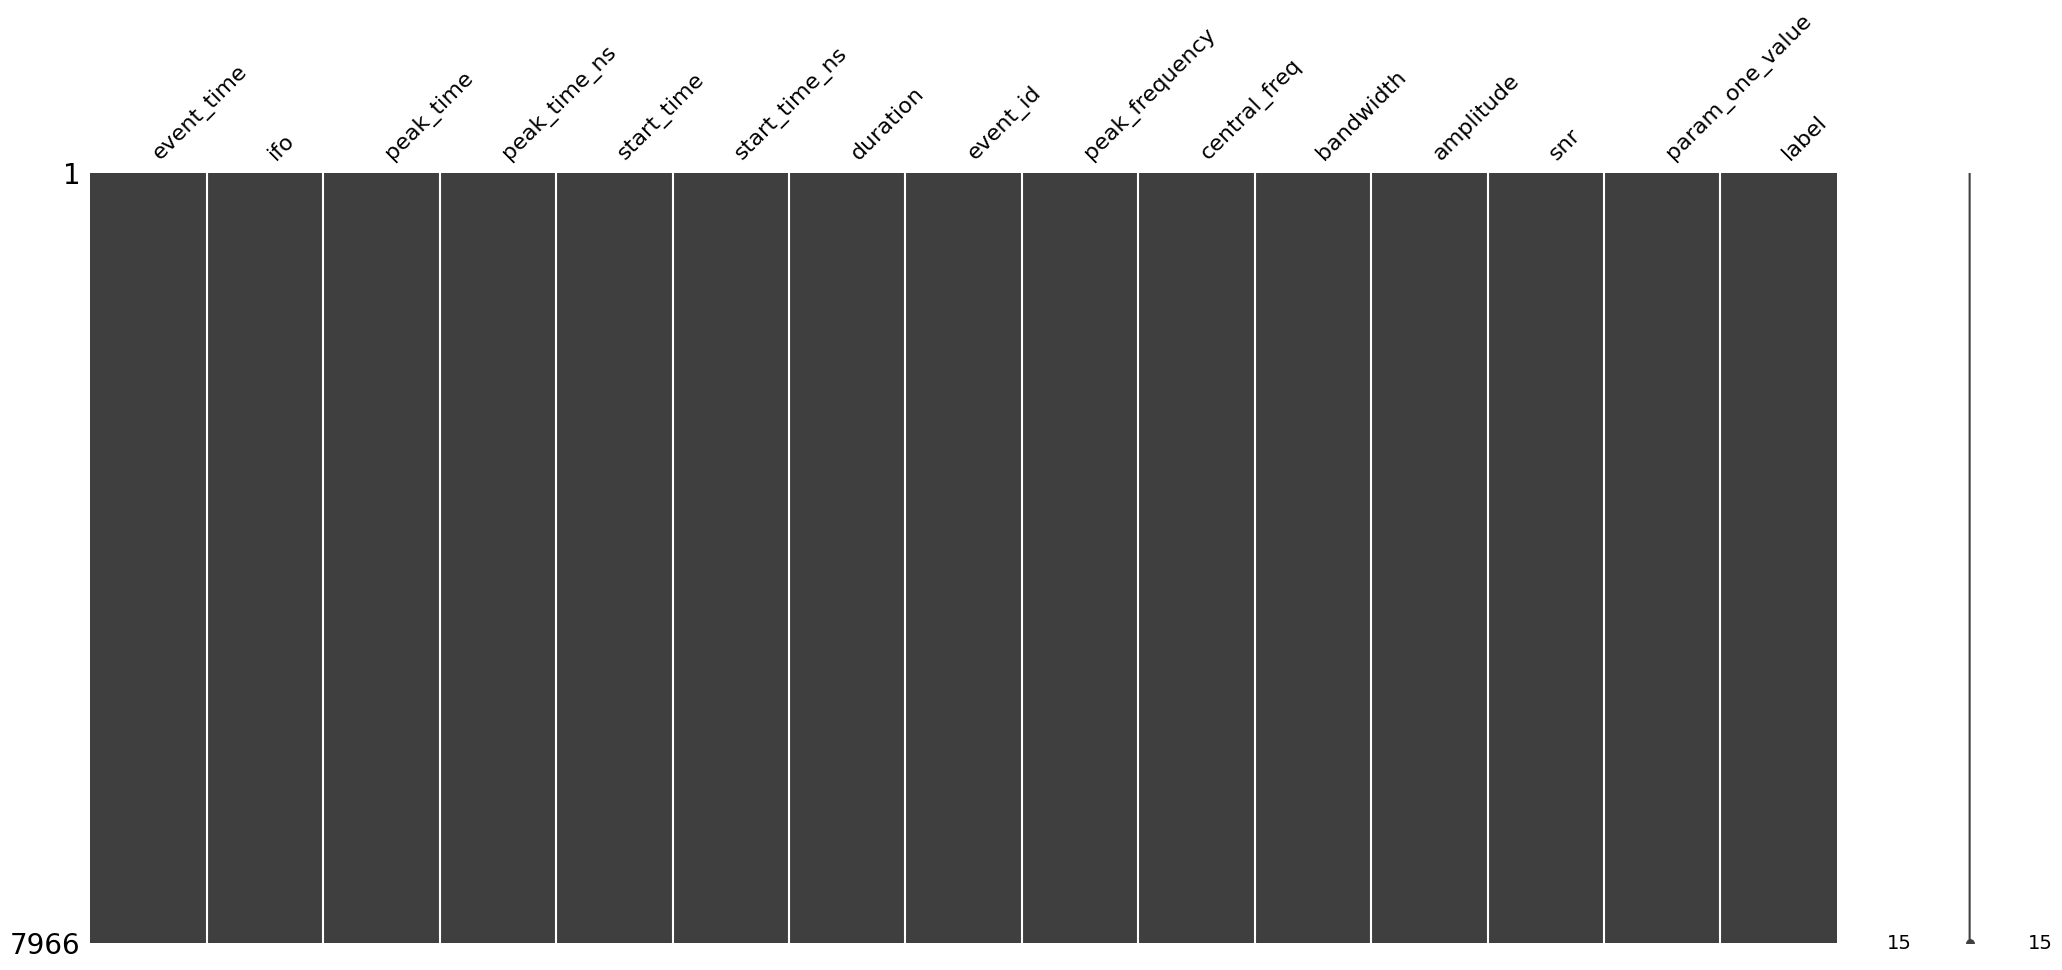

In [13]:
msno.matrix(df)
plt.show()

We see that there are no missing values in the dataset. To provide a more reliable model, we should try to add missing values to the dataset, so that it performes better in a more realistic context.

In [14]:
def add_missing(col, amount):
    X = col.copy()
    size = int(amount) if isinstance(amount, int) else int(len(X) * amount)
    
    if size <= 0:  # Ensure at least one missing value if applicable
        return X

    indexes = np.random.default_rng().choice(len(X), size, replace=False)  # Random generator
    X.iloc[indexes] = np.nan if hasattr(X, "iloc") else X[indexes] 
    return X

We choose as columns to add missing values to "peak_frequency", "amplitude", "snr", and "ifo".

In [15]:
selected_num_cols = ["peak_frequency", "amplitude", "snr"]
selected_cat_cols = ["ifo"]

# we choose to add 5% missing values
missing_percentage = 0.05

for column in selected_num_cols + selected_cat_cols:
    df[column] = add_missing(df[column], missing_percentage)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
event_time           0
ifo                398
peak_time            0
peak_time_ns         0
start_time           0
start_time_ns        0
duration             0
event_id             0
peak_frequency     398
central_freq         0
bandwidth            0
amplitude          398
snr                398
param_one_value      0
label                0
dtype: int64


Let's now visualize the missing values:

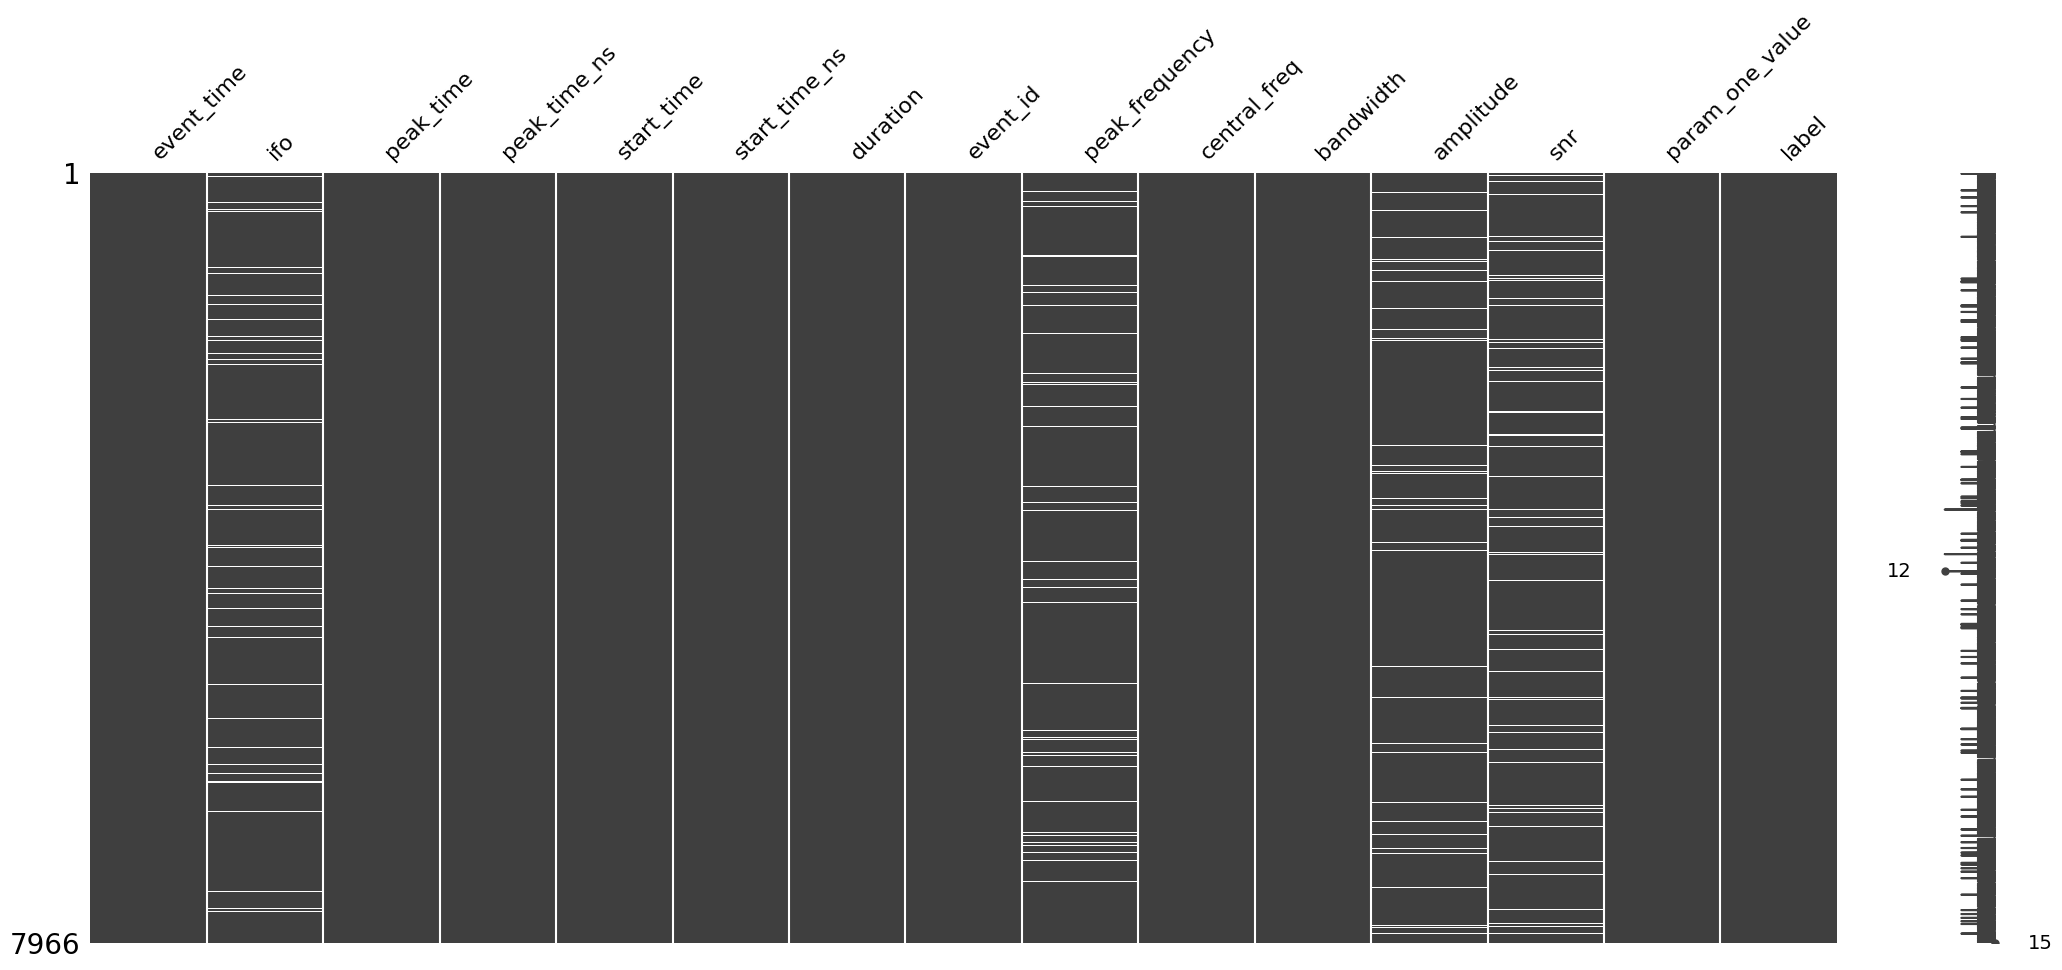

In [16]:
# Visualize new missing data
msno.matrix(df)
plt.show()

### Checking class balance

In [17]:
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))

label
Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Extremely_Loud          447
Low_Frequency_Lines     447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: count, dtype: int64
label
Blip                   0.228597
Koi_Fish               0.088627
Low_Frequency_Burst    0.077956
Light_Modulation       0.064273
Power_Line             0.056365
Extremely_Loud         0.056113
Low_Frequency_Lines    0.056113
Scattered_Light        0.055611
Violin_Mode            0.051720
Scratchy               0.042305
1080Lines              0.0

There are a lot of underrepresented classes, meaning that we don't posses enough samples to be able to crete a reliable predictive model. Hence it's wiser to drop them, and deal with less classes, so that our model can be more valid.

In [18]:
label_proportions = df['label'].value_counts(normalize=True)
min_proportion = 0.05
labels_to_keep = label_proportions[label_proportions >= min_proportion].index.tolist()
df = df[df['label'].isin(labels_to_keep)]

Let's plot the distribution of the remaining classes.

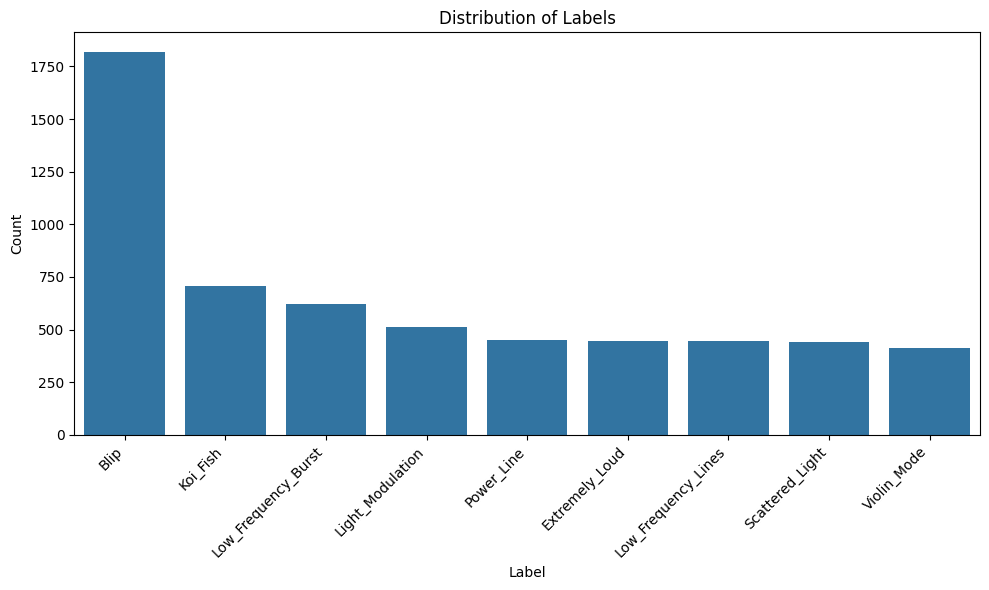

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

We see that the class 'Blip' is way more sampled than the other classes. We will deal with this in the pipeline definition.

### Planning the Scaling

Let's examine the distribution of the numerical features to assess their scaling needs and identify potential outliers that could impact the analysis.

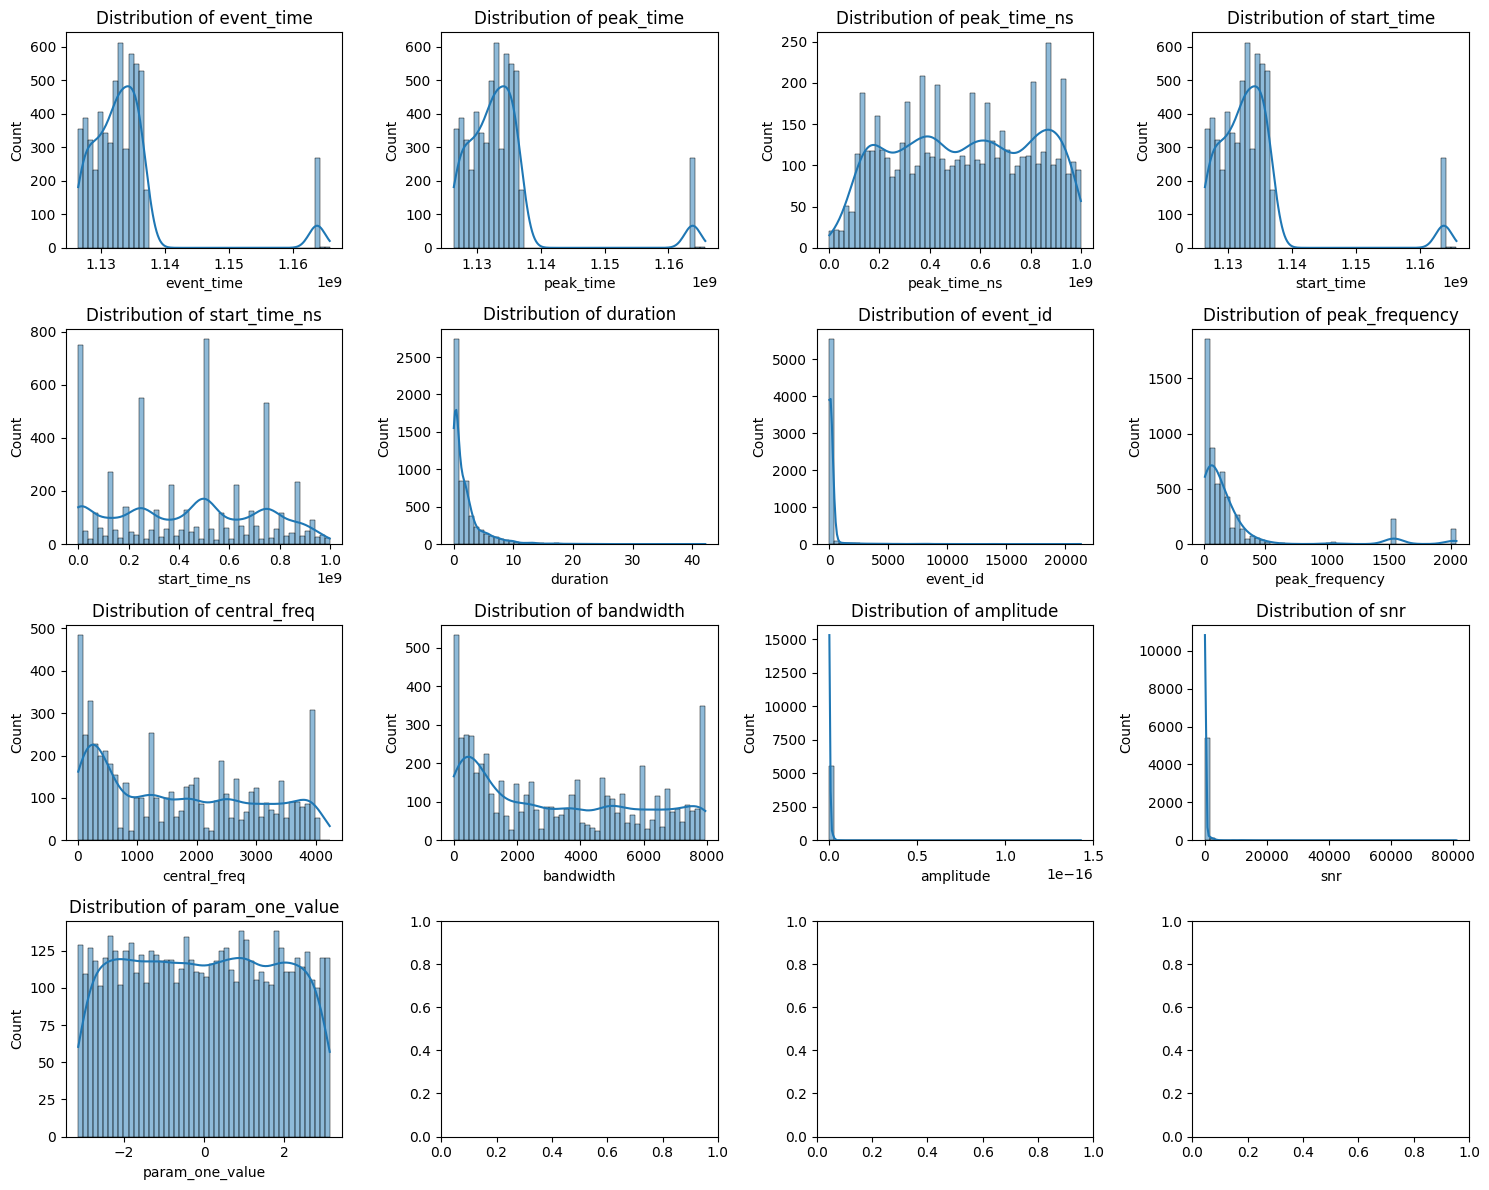

In [20]:
selected_num_cols = df.select_dtypes(include=[np.number]) # only numerical columns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(selected_num_cols):
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

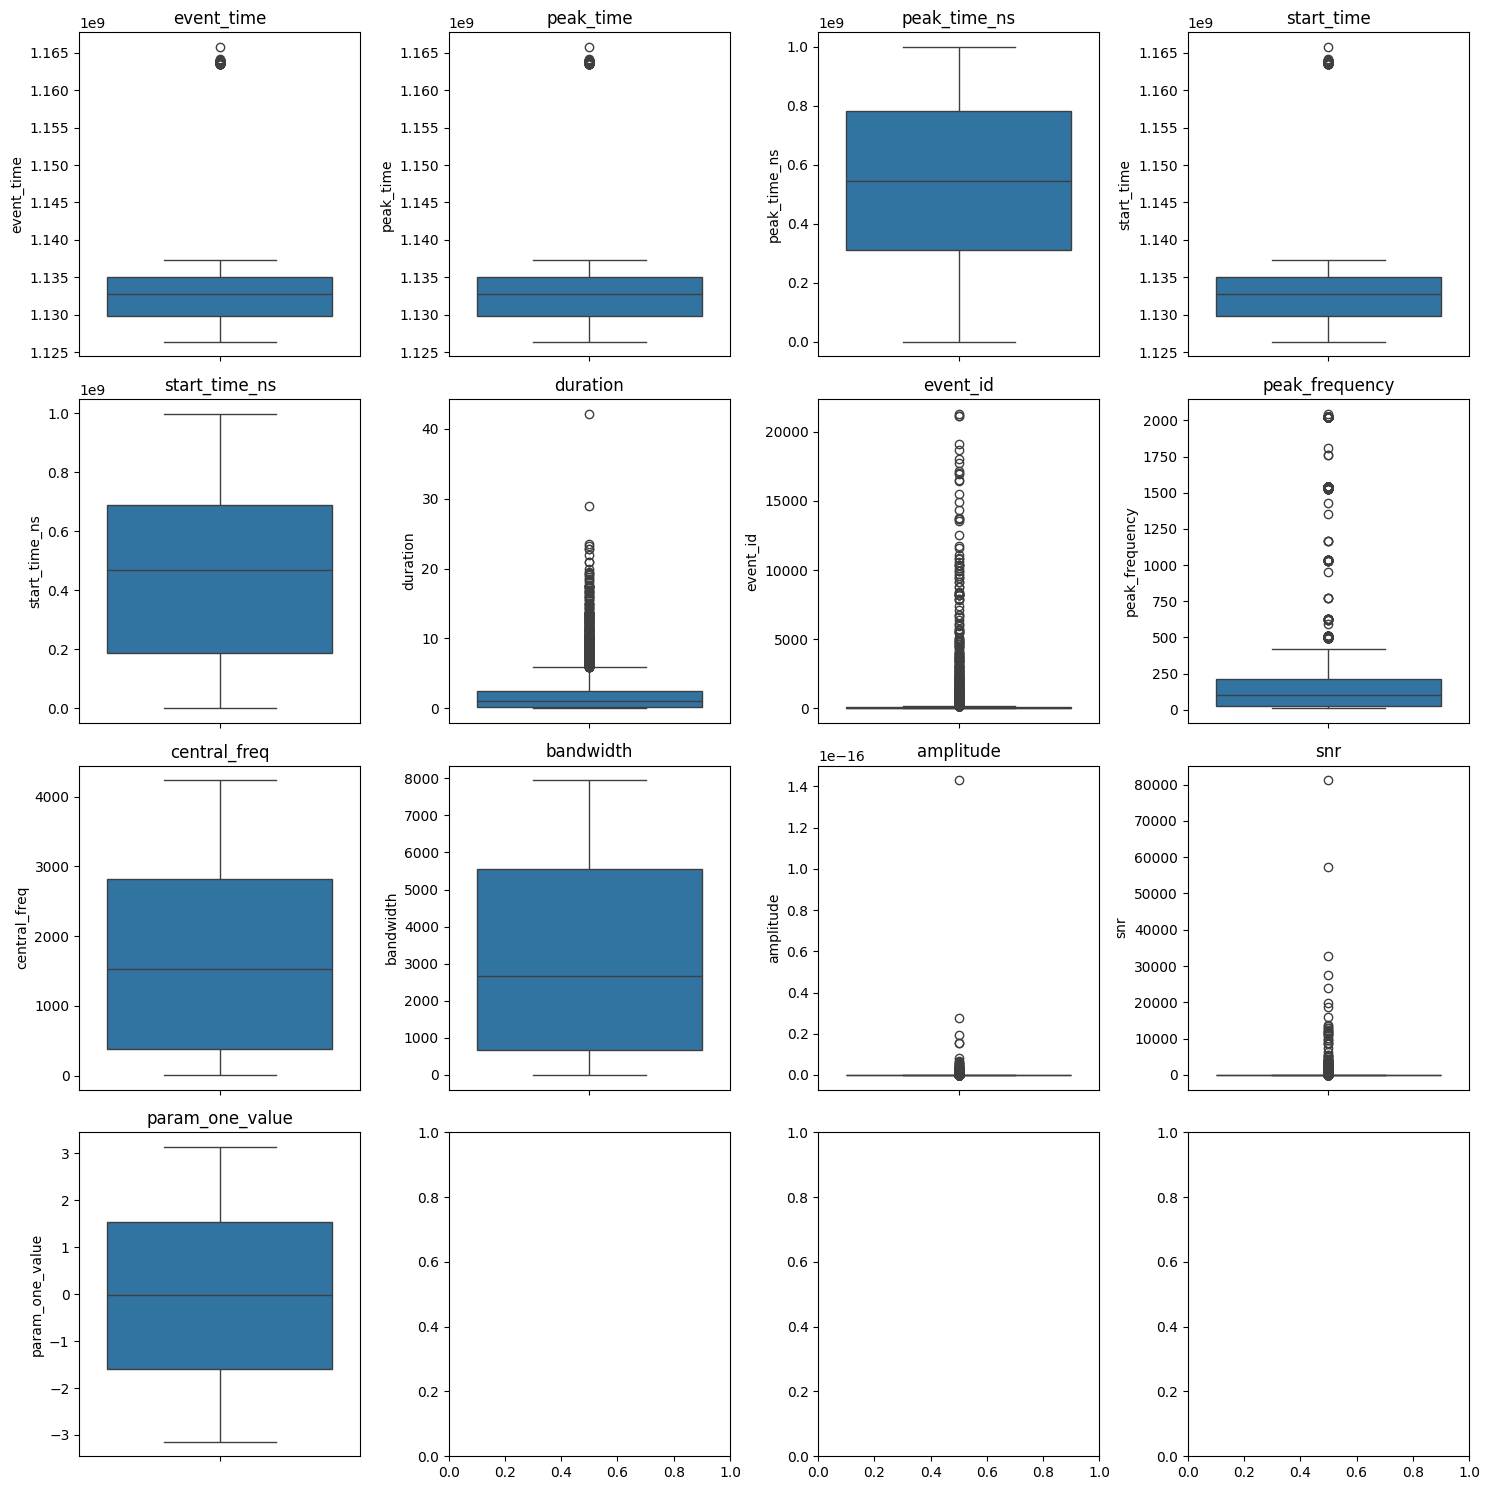

In [21]:
selected_num_cols = df.select_dtypes(include=[np.number])

# Generate box plots for numerical features
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(selected_num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [22]:
# List the continuous features that need scaling.
continuous_features = [
    'event_time', 'start_time', 'peak_time', 'central_freq', 'bandwidth', 'peak_frequency',
    'amplitude', 'snr', 'start_time_ns', 'peak_time_ns',
]

def compute_outlier_ratio(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers) / len(series)

threshold = 0.05  # 5%

robust_features = []
standard_features = []

for feature in continuous_features:
    ratio = compute_outlier_ratio(df[feature].dropna())
    print(f"{feature}: {ratio:.2%} outliers")
    if ratio > threshold:
        robust_features.append(feature)
    else:
        standard_features.append(feature)

print("\nFeatures with many outliers (using RobustScaler):", robust_features)
print("Features with few outliers (using StandardScaler):", standard_features)


event_time: 4.63% outliers
start_time: 4.63% outliers
peak_time: 4.63% outliers
central_freq: 0.00% outliers
bandwidth: 0.00% outliers
peak_frequency: 8.53% outliers
amplitude: 19.27% outliers
snr: 14.35% outliers
start_time_ns: 0.00% outliers
peak_time_ns: 0.00% outliers

Features with many outliers (using RobustScaler): ['peak_frequency', 'amplitude', 'snr']
Features with few outliers (using StandardScaler): ['event_time', 'start_time', 'peak_time', 'central_freq', 'bandwidth', 'start_time_ns', 'peak_time_ns']


One key reason for detecting outliers is their impact on scaling methods. Standard scaling (z-score normalization) relies on the mean and standard deviation, which can be disproportionately affected by extreme values, leading to distorted feature transformations. In contrast, robust scaling, which uses the median and interquartile range (IQR), is more resilient to outliers.

### Analysing features correlation

Feature correlation is fundamental to deterimine the most relevant and important features to consider during teh categorization of the glitches

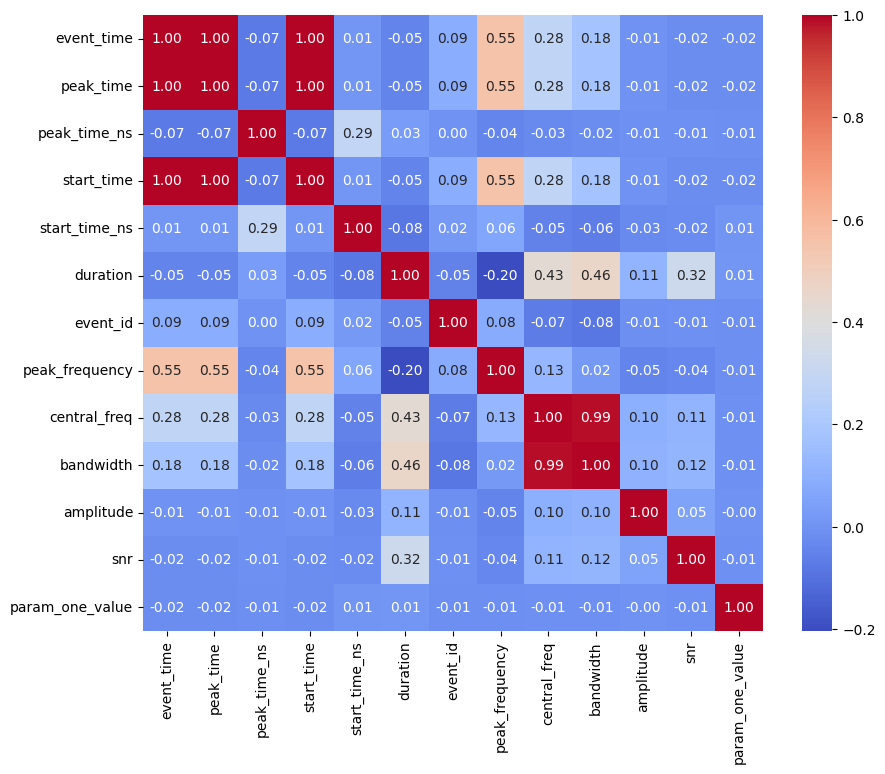

In [23]:
# Compute correlation matrix using only numeric columns
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

We see that:

- 'peak_frequency' and 'central_freq' show a moderate correlation (~0.56).

- 'central_freq' and 'bandwidth' are highly correlated (~0.99).

- 'snr' has a low correlation with most features, meaning it might be an independent predictor.

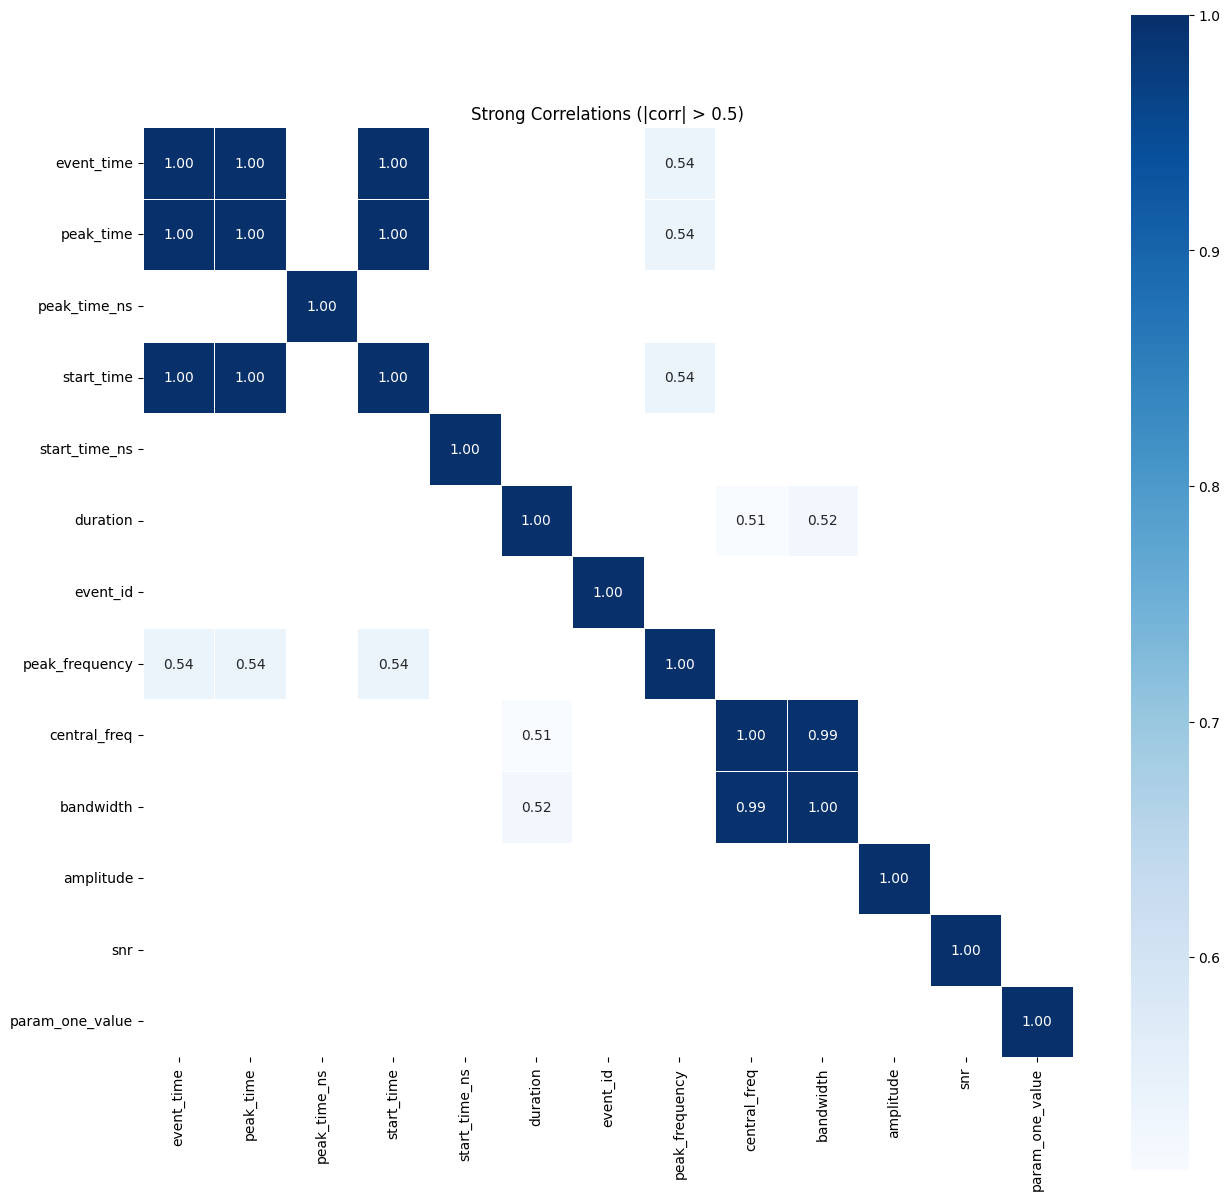

In [24]:
# Let's see in detail the strong correlations (> 0.5)

# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 15))
corr_matrix_filtered = numeric_df.corr()

# Apply a mask to highlight only strong correlations (|corr| > 0.5)
mask = np.abs(corr_matrix_filtered) < 0.5

sns.heatmap(
    corr_matrix_filtered, mask=mask, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, square=True
)

plt.title("Strong Correlations (|corr| > 0.5)")
plt.show()

In ths matrix we have that:
- Dark blue squares indicate high correlations (close to 1).
- Lighter blue values show moderate correlations.
- Gray masked areas hide weak correlations (|corr| < 0.5).

We see that the strong correlations are:

1. `central_freq` and `bandwidth` (≈ 0.99) → extremely high correlation  
2. `peak_frequency` and `central_freq` (≈ 0.56) → moderately strong correlation  
3. `event_time`, `peak_time`, `start_time`→ very high correlation (time-related)

We now run a A Variance Inflation Factor (VIF) analysis, which is a diagnostic tool used in regression analysis to measure how much the variance of an estimated regression coefficient increases because of multicollinearity—that is, when predictor variables in a model are correlated with each other.

Variance Inflation Factor (VIF) Analysis:
        num_feature           VIF
0        event_time  3.002400e+15
1         peak_time  1.286743e+15
2      peak_time_ns  4.748679e+10
3        start_time  9.094742e+04
8      central_freq  4.026461e+02
9         bandwidth  3.858613e+02
5          duration  7.817791e+00
4     start_time_ns  3.845888e+00
7    peak_frequency  2.250082e+00
11              snr  1.182192e+00
6          event_id  1.057790e+00
10        amplitude  1.029266e+00
12  param_one_value  1.002694e+00


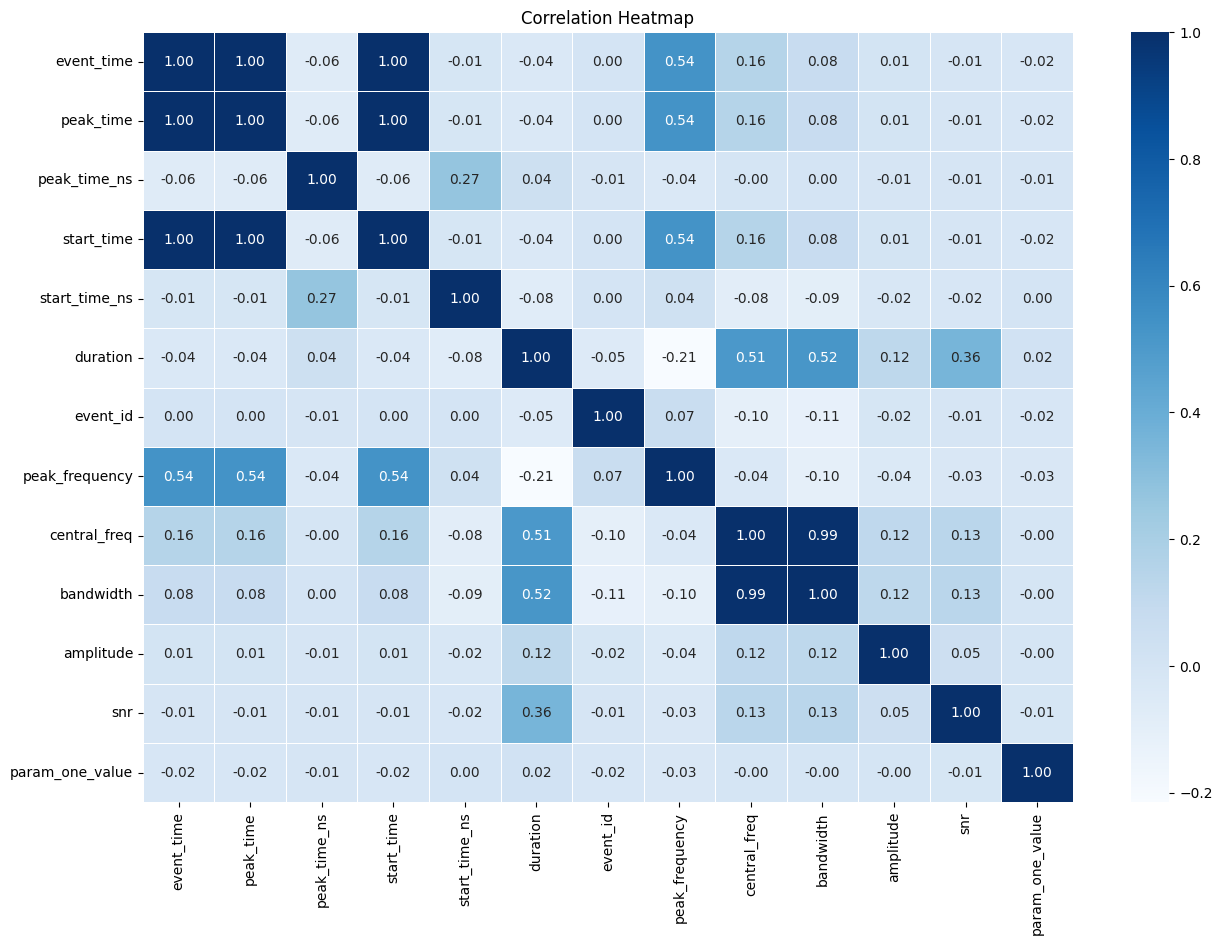

In [25]:
# only numerical features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

X_vif = df[num_features].dropna()  # Drop rows with missing values to avoid VIF computation errors

# Compute VIF
vif_data = pd.DataFrame()
vif_data["num_feature"] = X_vif.columns

# Handle potential categorical columns causing issues in variance_inflation_factor()
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# display VIF results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Identify highly collinear features (VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["num_feature"].tolist()

# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# we generate again a correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

(We again can see the correlations)

We can see that there are some features with severe multicollinearity ('event_time', 'start_time', 'peak_time'. Nonetheless, this is a time evolving based dataset. These features capture critical temporal dynamics and trends that are intrinsic to the phenomena under study. Their collinearity, therefore, might not be merely due of redundant information, but rather a reflection of the underlying time-dependent processes that drive the detecgtion of glitches.

Now we plot the  want to investigate the relationship between bandwidth and central frequency. By visualizing how these variables interact, we can assess whether a linear trend exists and determine the strength of their association. We can also categorize the data according to labels, so we can observe differences in behavior among groups.

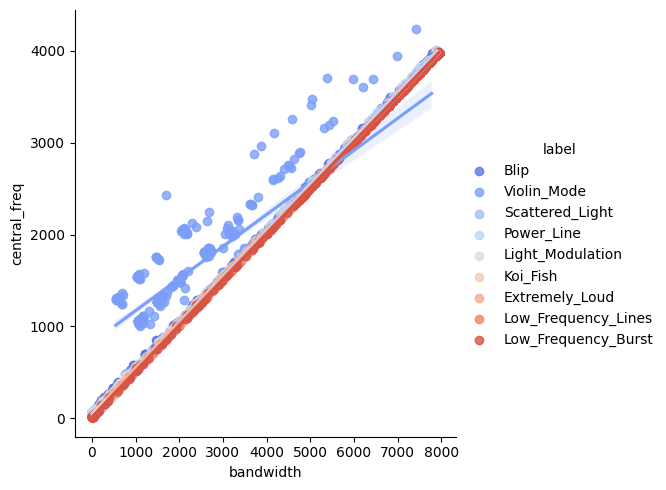

In [26]:
fig= sns.lmplot(data =df,x="bandwidth",y="central_freq", hue="label", palette='coolwarm' )
plt.show(fig)

From the plot we deduce a strong linear relationship between bandwidth and central frequency. The majority of data points appear to follow a nearly perfect linear trend, particularly for the red-colored categories, which dominate the distribution. This suggests a direct proportional relationship between these two variables , so we could easlity apply dimentionality reduction by PCA later on.

Let's further analyse other 'debated' features: 'event_id', and 'param_one_value'. To do so, we will implement the chi^2 test and the ANOVA test.

The chi^2 test is used for categorical data. It compares the observed counts in each category with the counts we would expect if there were no relationship between the feature and the target. A big difference suggests the feature is related to the target.

In [27]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# let's first convert 'event_id' to a string and then encode it as categorical
df['event_id'] = df['event_id'].astype(str)
le = LabelEncoder()
df['event_id_encoded'] = le.fit_transform(df['event_id'])

# The chi2 function expects non-negative features and target encoded as integers.
X = df[['event_id_encoded']]
y = df['label']

chi2_score, p_value = chi2(X, y)
print("Chi2 Score:", chi2_score[0])
print("p-value:", p_value[0])
# A low p-value (e.g., p < 0.05) suggests that the encoded ID has a significant association with the target.

Chi2 Score: 8837.967146994582
p-value: 0.0


The chi-squared statistic of approximately 25,119 with a p-value of 0.0 indicates an extremely significant association between the feature and the target (because less than the significan threeshold (0.05). However, it could be the case that, as an ID feature, it's inherently quasi-unique to each observation. So, when 'event_id' is encoded and tested, it can produce a perfect or near-perfect association simply because each identifier is linked to a single data point. This can lead to overfitting, where the model appears to perform well on the training data but fails to generalize to new, unseen data.

ANOVA is used for continuous data. It checks whether the average values of a feature differ significantly across groups defined by the target variable. A large difference in group means (relative to within-group variability) indicates the feature may be important for distinguishing the groups.

In [28]:
from scipy.stats import f_oneway

groups = [group["param_one_value"].values for name, group in df.groupby("label")]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")

ANOVA F-statistic: 1.5950611644751254, p-value: 0.12063079349206997


For ANOVA, a feature is generally considered relevant if it shows a high F-statistic and a low p-value (typically below  0.05). This indicates that the means of the feature across the groups defined by your target variable are statistically different. In your case, the F-statistic is about 1.595 and the p-value is roughly 0.121, which is above the common threshold of 0.05. This suggests that the differences in means across the groups are not statistically significant, and therefore, 'param_one_value' may not be a strong discriminator for the target, and it's therefore better to drop it.

In [29]:
# Drop 'event_id'
df.drop(columns=['event_id','event_id_encoded', 'param_one_value'], inplace=True)

# Train/test sets

Let's divide the dataframe in two: one for the training the model, and one for the testing of the model. We will use a standart ratio (80/20).

In [30]:
# Define features (X) and target (y)
X = df.drop(columns=["label"])
y = df["label"]

We stratify the split, so that the labels across the training and testing datasets are distributed equally.

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We now encode the label column, so that we can deal with the types of glitches for the multiclass classification.

In [32]:
# fit the label encoder on the training target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# transform the test labels using the same mapping
y_test_encoded = label_encoder.transform(y_test)

# Pipeline

We now define the pipeline for the data transformation.

<img src="image-20250216-205331.png" width="" align="" />

### Planning the scaling

We will now continue examine how scaling affects the data and how it's useful. Scaling adjusts the range of features in the dataset so that they contribute equally during model training. When features have vastly different scales, some may dominate the learning process. By standardizing features, we can improve model convergence, stability, and interpretability. So scaling helps ensure that each feature is given an appropriate weight, enhancing both model performance and the clarity of the insights we derive from our data.

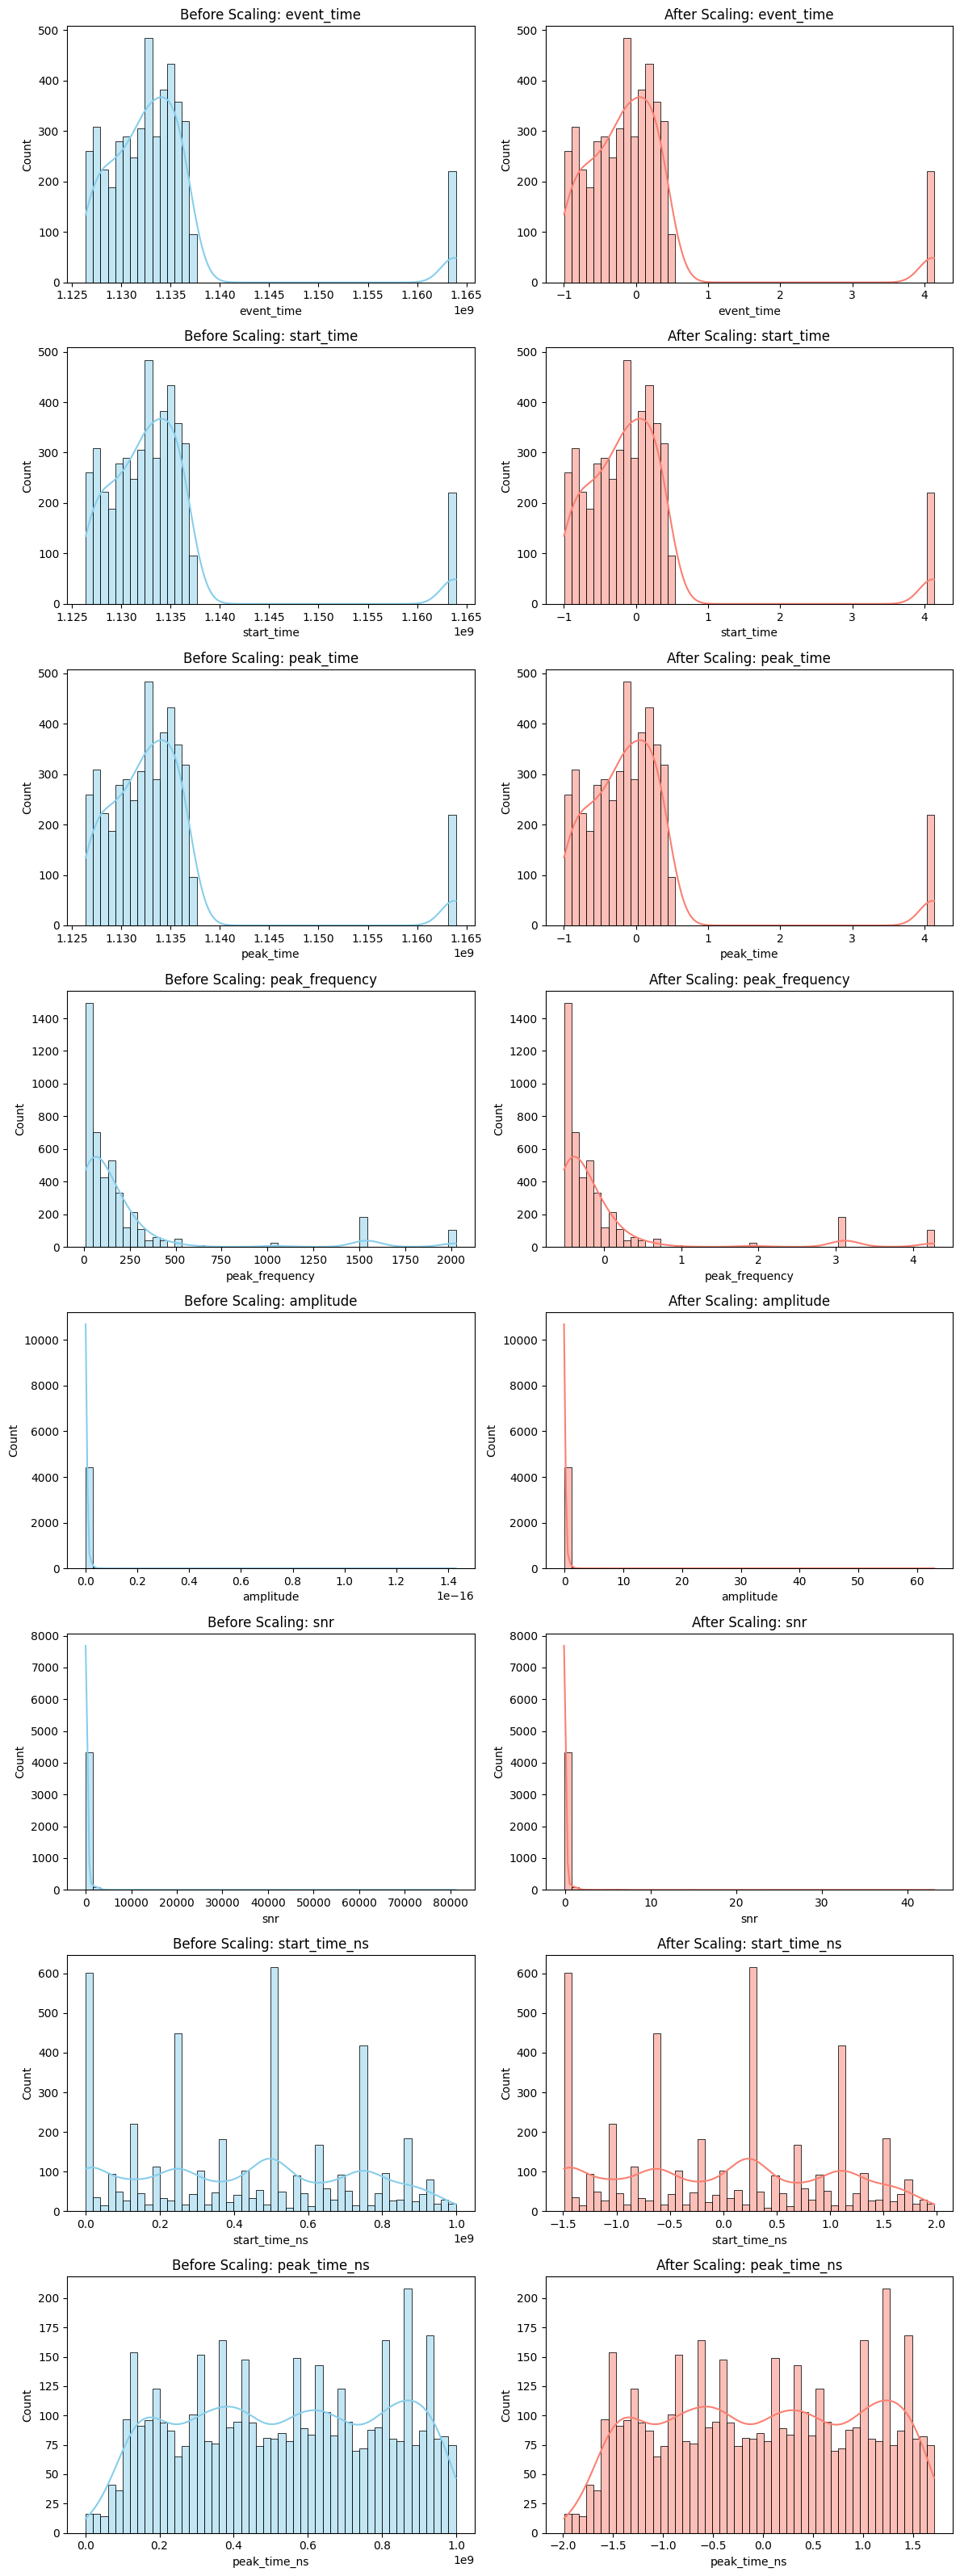

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# we make a copy of the original dataset
df_original = X_train.copy()
# also create copy for scaling (so the original remains unaltered)
df_scaled = X_train.copy()

features_to_compare = ['event_time', 'start_time', 'peak_time', 'peak_frequency', 
                       'amplitude', 'snr', 'start_time_ns', 'peak_time_ns']

# let's see the standard scaler
scaler = StandardScaler()

df_scaled[features_to_compare] = scaler.fit_transform(df_scaled[features_to_compare])

# before and after scaling side by side
n_features = len(features_to_compare)
fig, axes = plt.subplots(n_features, 2, figsize=(12, 4 * n_features))

# before
for i, feature in enumerate(features_to_compare):
    sns.histplot(df_original[feature].dropna(), bins=50, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    axes[i, 0].set_xlabel(feature)
    
    # after
    sns.histplot(df_scaled[feature].dropna(), bins=50, kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'After Scaling: {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()

We talked about implementing PCA to combine central frequency and bandwidth before, resulting in:

$$$

\mathcal{B}_{\mathrm{PCA}} = a\,f_c + b\,\Delta f

$$$


We would first extract the two features 'central_freq' and 'bandwidth' from the scaled training set, so the process starts by standardizing the data so that both features contribute equally to the analysis. The next step involves calculating how these features vary together, which is captured by the covariance matrix.

PCA then finds the directions in which the data varies the most by performing an eigen decomposition on this matrix. The direction corresponding to the highest variance is chosen as the principal component (see picture), and each data point is projected onto this direction to obtain its Principal Component Score (PCS). 

<img src="image-20250216-162703.png" width="" align="" />

In effect, the PCS is a weighted combination of 'bandwidth' and 'central_freq' that captures most of the variability in these two features. This single score can be very useful because it reduces the number of features, thereby simplifying the model, addressing issues of multicollinearity, and potentially reducing noise by focusing on the main pattern of variation in the data.

We initialize PCA to reduce these two features to one principal component. After fitting, the PCA components (coefficients) represent the weights  𝑎  and 𝑏 in the linear combination. Then we transform both the training and test data with the fitted PCA to obtain the new feature, which we then add back to the respective Dataframes.

### Model Selection

Let's define a starting pipeline to handle the data and run a sanity check.

In [34]:
# Pipeline for numeric features without many outliers
pipeline_numeric_less_outliers = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Pipeline for numeric features with many outliers
pipeline_numeric_more_outliers = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Pipeline for ordinal features
pipeline_ordinal = Pipeline([
    ('ord_enc', OrdinalEncoder(categories=[[1.0, 2.0, 3.0]]))
])

# Pipeline for ifo
pipeline_categorical = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline for dimensionality reduction using PCA on central_freq, bandwidth
pipeline_pca = Pipeline([
    ('pca', PCA(n_components=1))
])


preprocessor = ColumnTransformer(
    transformers=[
        # Numeric columns: imputation and scaling
        ('numeric_less_outliers', pipeline_numeric_less_outliers, ['central_freq', 'bandwidth', 'start_time_ns', 'peak_time_ns']),
        ('numeric_more_outliers', pipeline_numeric_more_outliers, ['event_time', 'start_time', 'peak_time', 'peak_frequency', 'amplitude', 'snr']),
        
        # Categorical column  ifo
        ('categorical', pipeline_categorical, ['ifo']),
        
        # PCA on central_freq, bandwidth
        ('pca', pipeline_pca, ['central_freq', 'bandwidth'])
    ],
    remainder='drop',                  # drop any columns not specified
    verbose_feature_names_out=False    
)


Sanity check:

In [35]:
starting_pipeline = IMBPipeline([
    ('trans', preprocessor),
    ('sampler', 'passthrough'),
    ('dim_reduction', 'passthrough'),
    ('classifier', RandomForestClassifier())
])

In [36]:
starting_pipeline.fit(X_train, y_train)
predictions = starting_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9121160409556314


In [37]:
set_config(display="diagram")
starting_pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numeric_less_outliers',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['central_freq', 'bandwidth',
                                                   'start_time_ns',
                                                   'peak_time_ns']),
                                                 ('numeric_more_outliers',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['event_time', 'start_time',
                                                   'peak_time',
                                                   'peak_frequ...
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['ifo']),
                                                 ('pca',
                                                  Pipeline(steps=[('pca',
                                                                   PCA(n_components=1))]),
                                                  ['central_freq',
                                                   'bandwidth'])],
                                   verbose_feature_names_out=False)),
                ('sampler', 'passthrough'), ('dim_reduction', 'passthrough'),
                ('classifier', RandomForestClassifier())])

In [38]:
print('Predictions:', predictions)

Predictions: ['Blip' 'Power_Line' 'Low_Frequency_Burst' ... 'Power_Line' 'Blip'
 'Low_Frequency_Burst']


# Hyperparameter Tuning

We now systematically search for the best combination of these settings to maximize model accuracy, generalizability, and efficiency. We will use grid search, which tests predefined hyperparameter values, and random search, which samples random combinations. 

By fine-tuning hyperparameters, we ensure that our model is neither too simple nor too complex, leading to better predictions and improved performance on unseen data. This step is essential in building robust and well-generalized machine learning models.

In [39]:
sampler_configs = [
    {'sampler': [None]},  # No resampling
    {
        'sampler': [RandomOverSampler()],
        'sampler__sampling_strategy': ['minority']
    },
    {
        'sampler': [RandomUnderSampler()],
        'sampler__sampling_strategy': ['majority']
    },
    {
        'sampler' : [SMOTE()]
    }
]

dim_reduction_configs = [
    {'dim_reduction': [None]},  # No dimensionality reduction
    {
        'dim_reduction': [PCA(random_state=0)],
        'dim_reduction__n_components': [0.1, 0.5, 0.9]
    },
    {
        'dim_reduction': [SequentialFeatureSelector(estimator=Perceptron(), cv = None, scoring = 'f1_macro')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    },
    {
        'dim_reduction': [LDA()]
    }
]

In [40]:
classifier_configs = [
    {
        'classifier': [RandomForestClassifier(random_state=0)],
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': [None, 'sqrt', 'log2']
    }
]

In [41]:
pipeline_configs = [dict(itertools.chain(*(e.items() 
for e in configuration))) 
for configuration in 
itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

f'Number of all possible configurations: {len(pipeline_configs)}'

'Number of all possible configurations: 16'

In [44]:
param_distribution = pipeline_configs

random_search = RandomizedSearchCV(
    starting_pipeline,
    param_distribution,
    scoring='f1_macro',
    n_jobs=-1,
    n_iter=len(pipeline_configs) * 5,
    error_score='raise',
    verbose=1,
    random_state=42,
) # cv = 3 by default

In [42]:
scores = cross_validate(
    random_search,  
    X_train,
    y_train,
    scoring='f1_macro', 
    cv=4,
    return_estimator=True,
    verbose=3,  
    n_jobs=-1,  
    error_score='raise'
) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

AttributeError: SequentialFeatureSelector has not been fitted, yet.

In [54]:
import joblib

# Save the cross-validation results to a file
joblib.dump(scores, 'cross_val_scores.pkl')
print("Cross-validation results have been saved.")

Cross-validation results have been saved.


In [46]:
import joblib
# Load the previously saved results
scores = joblib.load('cross_val_scores.pkl')
print("Cross-validation results have been loaded.")

# Iterate over all candidates and display their details with associated scores
for idx, estimator in enumerate(scores['estimator']):
    best_params = estimator.best_estimator_.get_params()
    print(f"Candidate {idx + 1}:")
    print(f"  Sampler:         {best_params['sampler']}")
    print(f"  Dim Reduction:   {best_params['dim_reduction']}")
    print(f"  Classifier:      {best_params['classifier']}")
    print(f"  Classifier Params: {best_params['classifier'].get_params()}")
    print(f"  Test Score:      {scores['test_score'][idx]:.4f}")
    print("-" * 40)

Cross-validation results have been loaded.
Candidate 1:
  Sampler:         None
  Dim Reduction:   None
  Classifier:      RandomForestClassifier(max_depth=20, n_estimators=50, random_state=0)
  Classifier Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
  Test Score:      0.8812
----------------------------------------
Candidate 2:
  Sampler:         RandomOverSampler(sampling_strategy='minority')
  Dim Reduction:   SequentialFeatureSelector(cv=None, estimator=Perceptron(), k_features=(10, 10),
                          scoring='f1_macro')
  Classifier:      RandomForestClassifier(max_depth=20, max_features='log2', min_sam

In [50]:
# Load the previously saved results
scores = joblib.load('cross_val_scores.pkl')
print("Cross-validation results have been loaded.")

# Iterate over each candidate from the cross-validation results
for idx, search in enumerate(scores['estimator']):
    # Get the best estimator from the RandomizedSearchCV candidate
    best_estimator = search.best_estimator_
    
    # Re-fit the best estimator on the entire training set
    best_estimator.fit(X_train, y_train)
    
    # Generate predictions on the training and test sets
    pred_train = best_estimator.predict(X_train)
    pred_test = best_estimator.predict(X_test)
    
    # Compute F1 scores with macro averaging for multiclass classification
    f1_train = f1_score(y_train, pred_train, average='macro')
    f1_test = f1_score(y_test, pred_test, average='macro')
    
    print(f"Candidate {idx + 1}:")
    print(f"  F1 on training set: {f1_train:.4f}")
    print(f"  F1 on test set:     {f1_test:.4f}")
    print("-" * 40)

Cross-validation results have been loaded.


ValueError: A given column is not a column of the dataframe

Let's build the final pipeline.

In [54]:
selected_pipeline = IMBPipeline([
    ('trans', preprocessor), 
    ('sampler', RandomOverSampler(sampling_strategy='minority')),
    ('dim_reduction', SequentialFeatureSelector(
        estimator=Perceptron(),
        k_features=10,           
        scoring='f1_macro',
        cv=None                  
    )),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=5,
        n_estimators=50,
        max_features='sqrt',
        random_state=42
    ))
])

# Fit the pipeline on your training data:
selected_pipeline.fit(X_train, y_train)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numeric_less_outliers',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['central_freq', 'bandwidth',
                                                   'start_time_ns',
                                                   'peak_time_ns']),
                                                 ('numeric_more_outliers',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['event_time', 'start_time',
                                                   'peak_time',
                                                   'peak_frequ...
                                                  ['central_freq',
                                                   'bandwidth'])],
                                   verbose_feature_names_out=False)),
                ('sampler', RandomOverSampler(sampling_strategy='minority')),
                ('dim_reduction',
                 SequentialFeatureSelector(cv=None, estimator=Perceptron(),
                                           k_features=(10, 10),
                                           scoring='f1_macro')),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=5, n_estimators=50,
                                        random_state=42))])

In [56]:
best_params = selected_pipeline.get_params()

print("Best parameters for Candidate 3:")
print("Sampler:", best_params['sampler'])
print("Dimensionality Reduction:", best_params['dim_reduction'])
print("Classifier:", best_params['classifier'])

print("\nDetailed Classifier Parameters:")
for param, value in best_params['classifier'].get_params().items():
    print(f"  {param}: {value}")

Best parameters for Candidate 3:
Sampler: RandomOverSampler(sampling_strategy='minority')
Dimensionality Reduction: SequentialFeatureSelector(cv=None, estimator=Perceptron(), k_features=(10, 10),
                          scoring='f1_macro')
Classifier: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50, random_state=42)

Detailed Classifier Parameters:
  bootstrap: True
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: 10
  max_features: sqrt
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 4
  min_samples_split: 5
  min_weight_fraction_leaf: 0.0
  monotonic_cst: None
  n_estimators: 50
  n_jobs: None
  oob_score: False
  random_state: 42
  verbose: 0
  warm_start: False


In [58]:
# Predict on training and test sets using the selected pipeline
y_train_pred = selected_pipeline.predict(X_train)
y_test_pred = selected_pipeline.predict(X_test)

# Compute F1 scores using macro averaging
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("F1 Score on Training Set: {:.4f}".format(f1_train))
print("F1 Score on Test Set: {:.4f}".format(f1_test))

F1 Score on Training Set: 0.9393
F1 Score on Test Set: 0.8908


Confusion Matrix (Training Set):
[[1423    0   16    7    1    0    4    6    0]
 [   2  338   14    1    2    0    0    0    0]
 [  31    4  525    5    0    0    0    0    0]
 [  62    0    5  320   15    4    1    2    0]
 [   4    3    2    4  465   16    0    3    0]
 [   4    1    3    3   31  313    1    2    0]
 [   8    0    0    0    0    0  350    1    0]
 [   2    0    1    2    3    3    1  342    0]
 [   0    0    0    0    0    0    0    0  330]]


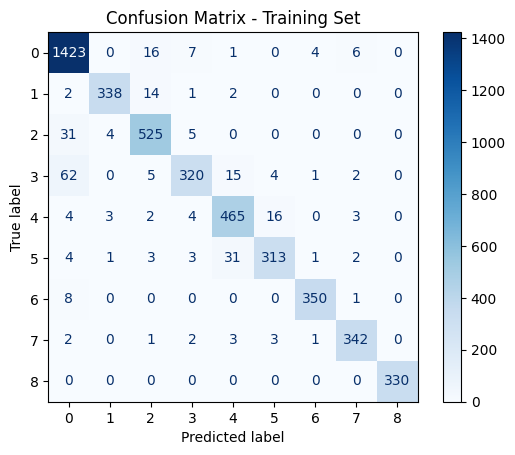

In [60]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(conf_matrix)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Set")
plt.show()

# Learning and Validation curves

We will now explore the learning curve and validation curves to assses our model performance.

Learning curves help visualize how a model's performance evolves as the amount of training data increases. By plotting training and validation scores against dataset size, they provide insights into whether a model is suffering from **underfitting** (high bias) or **overfitting** (high variance). A well-balanced model should show an improvement in validation performance as more data is introduced while maintaining a reasonable gap between training and validation scores.

Validation curves, on the other hand, show how model performance changes with respect to a specific hyperparameter (in our case the 'max_depth'. By plotting training and validation scores against different values of a chosen hyperparameter, we can determine whether the model is too simple (underfitting) or too complex (overfitting). This helps in selecting optimal hyperparameter values that generalize well to unseen data.

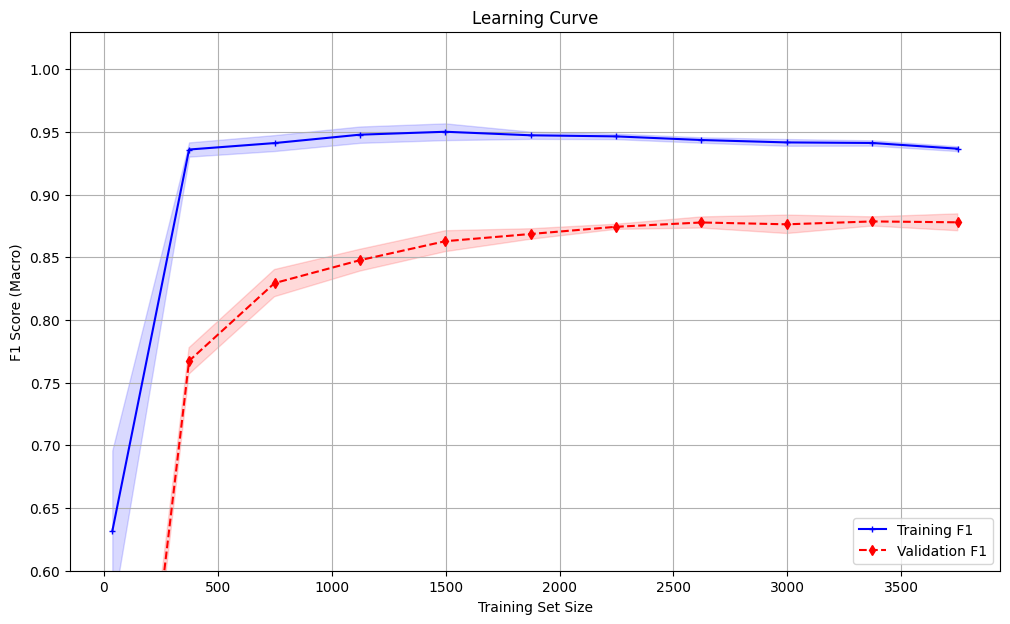

In [62]:

train_sizes, train_scores, test_scores = learning_curve(
    selected_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='f1_macro',  
    n_jobs=-1,
    train_sizes=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    shuffle=False  
)

# Calculate mean and standard deviation for training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean, color='blue', marker='+', markersize=5, label='Training F1')
ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean, color='red', linestyle='--', marker='d', markersize=5, label='Validation F1')
ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')

ax.set_xlabel('Training Set Size')
ax.set_ylabel('F1 Score (Macro)')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])
ax.grid(True)
plt.title("Learning Curve")
plt.show()

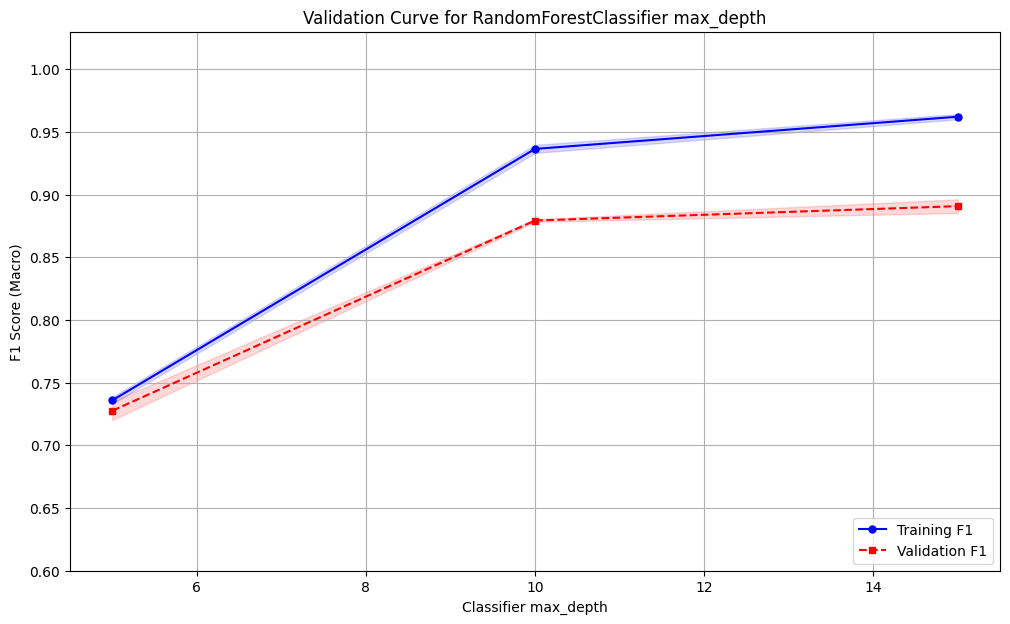

In [64]:
param_range = np.arange(5, 16, 5)

train_scores_val, test_scores_val = validation_curve(
    selected_pipeline,
    X_train,
    y_train,
    param_name='classifier__max_depth',
    param_range=param_range,
    cv=5,
    n_jobs=-1,
    scoring='f1_macro'
)

train_mean_val = np.mean(train_scores_val, axis=1)
train_std_val = np.std(train_scores_val, axis=1)
test_mean_val = np.mean(test_scores_val, axis=1)
test_std_val = np.std(test_scores_val, axis=1)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

ax.plot(param_range, train_mean_val, color='blue', marker='o', markersize=5, label='Training F1')
ax.fill_between(param_range, train_mean_val + train_std_val, train_mean_val - train_std_val, alpha=0.15, color='blue')

ax.plot(param_range, test_mean_val, color='red', linestyle='--', marker='s', markersize=5, label='Validation F1')
ax.fill_between(param_range, test_mean_val + test_std_val, test_mean_val - test_std_val, alpha=0.15, color='red')

ax.set_xlabel('Classifier max_depth')
ax.set_ylabel('F1 Score (Macro)')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])
ax.grid(True)
plt.title("Validation Curve for RandomForestClassifier max_depth")
plt.show()

# Final Considerations

The learning curve shows that as the training set grows, validation performance improves but remains lower than the training score, indicating overfitting. The gap suggests that the model generalizes less effectively, which could be influenced by the time-evolving nature of the dataset. More training data helps, but the validation score stabilizes around 0.86, while the training score remains near 0.95.

The validation curve for max_depth shows that increasing tree depth improves both training and validation scores, but the gap widens, confirming overfitting. A depth of around 10 appears to be a good trade-off between performance and generalization.

Overfitting is expected due to the dataset’s temporal nature, but it can be mitigated through time-aware cross-validation, and feature engineering to capture time-dependent patterns.